In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'INFY.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794921,0.796679,0.791015,0.796679,0.521856,204800
1996-01-02,0.794921,0.798828,0.793457,0.793457,0.519745,204800
1996-01-03,0.798828,0.798828,0.798828,0.798828,0.523264,102400
1996-01-04,0.791015,0.794921,0.791015,0.793554,0.519809,307200
1996-01-05,0.784179,0.784179,0.784179,0.784179,0.513668,51200
...,...,...,...,...,...,...
2024-06-18,1497.000000,1507.000000,1495.400024,1498.199951,1498.199951,5420939
2024-06-19,1505.000000,1515.650024,1496.699951,1511.349976,1511.349976,5493456
2024-06-20,1516.300049,1517.500000,1499.099976,1515.400024,1515.400024,7927010


In [13]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=5, epochs=9)

[array([1.72772405e-05, 1.56153087e-05, 1.83856869e-05, 1.56653601e-05,
       1.08297188e-05, 1.33483953e-05, 8.81502967e-06, 5.28902395e-06,
       1.43557553e-05, 1.20893030e-05, 7.55593736e-06, 9.31895559e-06,
       5.49070500e-06, 6.80030980e-06, 2.77034742e-06, 6.80030980e-06,
       5.54072559e-06, 3.77770735e-06, 2.26694415e-06, 2.26694415e-06])]
[0.0]

[array([1.72772405e-05, 1.56153087e-05, 1.83856869e-05, 1.56653601e-05,
       1.08297188e-05, 1.33483953e-05, 8.81502967e-06, 5.28902395e-06,
       1.43557553e-05, 1.20893030e-05, 7.55593736e-06, 9.31895559e-06,
       5.49070500e-06, 6.80030980e-06, 2.77034742e-06, 6.80030980e-06,
       5.54072559e-06, 3.77770735e-06, 2.26694415e-06, 2.26694415e-06]), array([1.56153087e-05, 1.83856869e-05, 1.56653601e-05, 1.08297188e-05,
       1.33483953e-05, 8.81502967e-06, 5.28902395e-06, 1.43557553e-05,
       1.20893030e-05, 7.55593736e-06, 9.31895559e-06, 5.49070500e-06,
       6.80030980e-06, 2.77034742e-06, 6.80030980e-06, 5.5407255

In [14]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 6s 9ms/step


0.9647248851969822

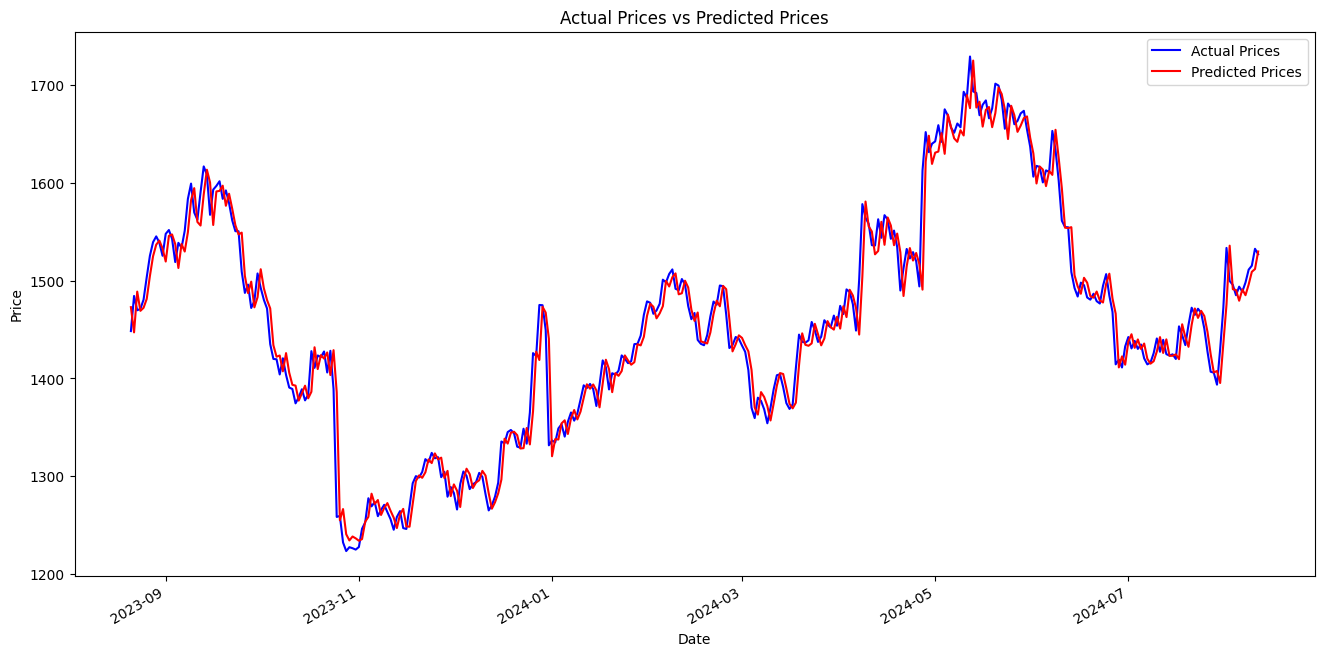

In [15]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [16]:
import joblib


model_file_path = '4.joblib'
scaler_file_path = 'scaler4.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 4.joblib
Scaler saved to scaler4.joblib
